In this notebook, I compare the positional differences of ICRF catalogs with respect to the Gaia DR2 as function of the declination.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: catalog_error_comparison.py
"""
Created on Sun May 27 15:28:04 2018

@author: Neo(liuniu@smail.nju.edu.cn)

Plot the smoothed declination difference as a function of declination of various catalogs.

"""

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
import numpy as np

# My modules
from my_progs.catalog.read_icrfn import read_icrf1, read_icrf2, read_icrf3
from my_progs.catalog.read_gaia import read_dr1_qso, read_dr2_qso
from my_progs.catalog.pos_diff import radio_cat_diff_calc
from my_progs.catalog.smoothed_error import smooth_by_dec

Read the catalogs.

In [2]:
# ICRF1 catalog
icrf1 = read_icrf1()

# ICRF2 catalog
icrf2 = read_icrf2()

# ICRF3 S/X catalog
icrf3sx = read_icrf3(wv="sx")

# ICRF3 K catalog
icrf3k = read_icrf3(wv="k")

# ICRF3 X/Ka catalog
icrf3xka = read_icrf3(wv="xka")

# Gaia DR2 aux_iers catalog
gdr2 = read_dr2_qso()

Calculate the positional offsets.

In [3]:
# ICRF1 - Gaia DR2
icrf1_gdr2 = radio_cat_diff_calc(icrf1, gdr2, "iers_name")
icrf1_gdr2.keep_columns(["ra", "dra", "ddec"])
icrf1_gdr2.filled()

print("There are", len(icrf1_gdr2), "sources between ICRF1 and Gaia DR2")

# ICRF2 - Gaia DR2
icrf2_gdr2 = radio_cat_diff_calc(icrf2, gdr2, "iers_name")
icrf2_gdr2.keep_columns(["ra", "dra", "ddec"])
icrf2_gdr2.filled()

print("There are", len(icrf2_gdr2), "sources between ICRF2 and Gaia DR2")

# ICRF3 SX - Gaia DR2
icrf3sx_gdr2 = radio_cat_diff_calc(icrf3sx, gdr2, "iers_name")
icrf3sx_gdr2.keep_columns(["ra", "dra", "ddec"])
icrf3sx_gdr2.filled()

print("There are", len(icrf3sx_gdr2), "sources between ICRF3 SX and Gaia DR2")

# ICRF3 K - Gaia DR2
icrf3k_gdr2 = radio_cat_diff_calc(icrf3k, gdr2, "iers_name")
icrf3k_gdr2.keep_columns(["ra", "dra", "ddec"])
icrf3k_gdr2.filled()

print("There are", len(icrf3k_gdr2), "sources between ICRF3 K and Gaia DR2")

# ICRF3 Xka Gaia DR2
icrf3xka_gdr2 = radio_cat_diff_calc(icrf3xka, gdr2, "iers_name")
icrf3xka_gdr2.keep_columns(["ra", "dra", "ddec"])
icrf3xka_gdr2.filled()

print("There are", len(icrf3xka_gdr2), "sources between ICRF3 Xka and Gaia DR2")

There are 490 sources between ICRF1 and Gaia DR2
There are 2327 sources between ICRF2 and Gaia DR2
There are 2818 sources between ICRF3 SX and Gaia DR2
There are 602 sources between ICRF3 K and Gaia DR2
There are 505 sources between ICRF3 Xka and Gaia DR2


First, I try with binning sources with a size of 50 sources.

In [5]:
# Bin sources by interval of 5 sources

binsize = 20

# ICRF1
icrf1_dec_bin = np.trunc(np.arange(len(icrf1_gdr2)) / binsize)
icrf1_gdr2.sort("ra")
icrf1_grouped = icrf1_gdr2.group_by(icrf1_dec_bin)
icrf1_binned = icrf1_grouped.groups.aggregate(np.median)

binsize = 50

# ICRF2
icrf2_dec_bin = np.trunc(np.arange(len(icrf2_gdr2)) / binsize)
icrf2_gdr2.sort("ra")
icrf2_grouped = icrf2_gdr2.group_by(icrf2_dec_bin)
icrf2_binned = icrf2_grouped.groups.aggregate(np.median)

# ICRF3 SX
icrf3sx_dec_bin = np.trunc(np.arange(len(icrf3sx_gdr2)) / binsize)
icrf3sx_gdr2.sort("ra")
icrf3sx_grouped = icrf3sx_gdr2.group_by(icrf3sx_dec_bin)
icrf3sx_binned = icrf3sx_grouped.groups.aggregate(np.median)

binsize = 20

# ICRF3 K
icrf3k_dec_bin = np.trunc(np.arange(len(icrf3k_gdr2)) / binsize)
icrf3k_gdr2.sort("ra")
icrf3k_grouped = icrf3k_gdr2.group_by(icrf3k_dec_bin)
icrf3k_binned = icrf3k_grouped.groups.aggregate(np.median)

# ICRF3 XKa
icrf3xka_dec_bin = np.trunc(np.arange(len(icrf3xka_gdr2)) / binsize)
icrf3xka_gdr2.sort("ra")
icrf3xka_grouped = icrf3xka_gdr2.group_by(icrf3xka_dec_bin)
icrf3xka_binned = icrf3xka_grouped.groups.aggregate(np.median)

/Users/Neo/softwares/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/Neo/softwares/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/Neo/softwares/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/Neo/softwares/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/Neo/softwares/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 

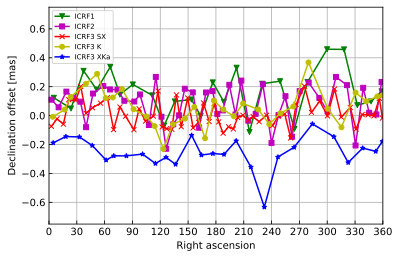

In [6]:
# Plot for median error
fig, ax = plt.subplots()

ax.plot(icrf1_binned["ra"], icrf1_binned["ddec"], "g-v", ms=5, label="ICRF1")
ax.plot(icrf2_binned["ra"], icrf2_binned["ddec"], "m-s", ms=5, label="ICRF2")
ax.plot(icrf3sx_binned["ra"], icrf3sx_binned["ddec"], "r-x", ms=5, label="ICRF3 SX")
ax.plot(icrf3k_binned["ra"], icrf3k_binned["ddec"], "y-o", ms=5, label="ICRF3 K")
ax.plot(icrf3xka_binned["ra"], icrf3xka_binned["ddec"], "b-*", ms=5, label="ICRF3 XKa")

ax.set_ylim([-0.75, 0.75])
ax.set_xlim([0, 360])
ax.set_xticks(np.arange(0, 361, 30))
ax.set_xlabel("Right ascension")
ax.set_ylabel("Declination offset [mas]")
ax.grid()  
ax.legend(fontsize="x-small")

# plt.savefig("../plots/eema-vs-num-binned.eps")

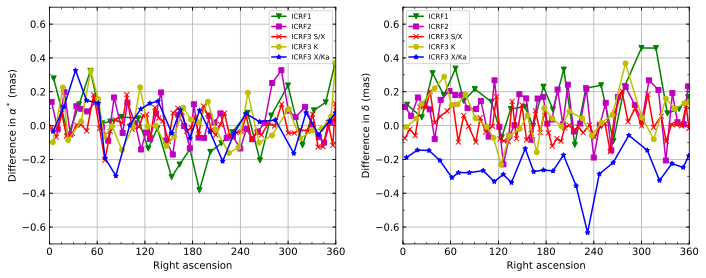

In [13]:
from matplotlib.ticker import MultipleLocator
minorLocator1 = MultipleLocator(0.1)
minorLocator2 = MultipleLocator(15)

# Plot for median error
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.plot(icrf1_binned["ra"], icrf1_binned["dra"], "g-v", ms=5, label="ICRF1")

ax0.plot(icrf2_binned["ra"], icrf2_binned["dra"], "m-s", ms=5, label="ICRF2")

ax0.plot(icrf3sx_binned["ra"], icrf3sx_binned["dra"], "r-x", ms=5, label="ICRF3 S/X")

ax0.plot(icrf3k_binned["ra"], icrf3k_binned["dra"], "y-o", ms=5, label="ICRF3 K")

ax0.plot(icrf3xka_binned["ra"], icrf3xka_binned["dra"], "b-*", ms=5, label="ICRF3 X/Ka")

ax0.set_ylim([-0.7, 0.7])
ax0.set_xlim([0, 360])
ax0.set_xticks(np.arange(0, 361, 60))

ax0.set_xlabel("Right ascension")
ax0.set_ylabel("Difference in $\\alpha^*$ (mas)")
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax0.yaxis.set_minor_locator(minorLocator1)
ax0.xaxis.set_minor_locator(minorLocator2)

ax0.grid()  
ax0.legend(fontsize="x-small")

ax1.plot(icrf1_binned["ra"], icrf1_binned["ddec"], "g-v", ms=5, label="ICRF1")

ax1.plot(icrf2_binned["ra"], icrf2_binned["ddec"], "m-s", ms=5, label="ICRF2")

ax1.plot(icrf3sx_binned["ra"], icrf3sx_binned["ddec"], "r-x", ms=5, label="ICRF3 S/X")

ax1.plot(icrf3k_binned["ra"], icrf3k_binned["ddec"], "y-o", ms=5, label="ICRF3 K")

ax1.plot(icrf3xka_binned["ra"], icrf3xka_binned["ddec"], "b-*", ms=5, label="ICRF3 X/Ka")

ax1.set_ylim([-0.7, 0.7])
ax1.set_xlim([0, 360])
ax1.set_xticks(np.arange(0, 361, 60))

ax1.set_xlabel("Right ascension")
ax1.set_ylabel("Difference in $\\delta$ (mas)")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax1.yaxis.set_minor_locator(minorLocator1)
ax1.xaxis.set_minor_locator(minorLocator2)

ax1.grid()  
ax1.legend(fontsize="x-small")

plt.tight_layout()
plt.savefig("../plots/pos-diff-vs-ra.eps")

Then I try a running median method.

In [8]:
# Smooth the positional difference of catalogs
bin_size = 50

# ICRF1 wrt. Gaia DR2
ra_icrf1, dra_icrf1 = smooth_by_dec(
    np.array(icrf1_gdr2["ra"]), np.array(icrf1_gdr2["dra"]), bin_size)
ra_icrf1, ddec_icrf1 = smooth_by_dec(
    np.array(icrf1_gdr2["ra"]), np.array(icrf1_gdr2["ddec"]), bin_size)

# ICRF2 wrt. Gaia DR2
ra_icrf2, dra_icrf2 = smooth_by_dec(
    np.array(icrf2_gdr2["ra"]), np.array(icrf2_gdr2["dra"]), bin_size)
ra_icrf2, ddec_icrf2=smooth_by_dec(
    np.array(icrf2_gdr2["ra"]), np.array(icrf2_gdr2["ddec"]), bin_size)

# ICRF3(SX) wrt. Gaia DR2
ra_icrf3sx, dra_icrf3sx=smooth_by_dec(
    np.array(icrf3sx_gdr2["ra"]), np.array(icrf3sx_gdr2["dra"]), bin_size)
ra_icrf3sx, ddec_icrf3sx=smooth_by_dec(
    np.array(icrf3sx_gdr2["ra"]), np.array(icrf3sx_gdr2["ddec"]), bin_size)

# ICRF3(K) wrt. Gaia DR2
ra_icrf3k, dra_icrf3k=smooth_by_dec(
    np.array(icrf3k_gdr2["ra"]), np.array(icrf3k_gdr2["dra"]), bin_size)
ra_icrf3k, ddec_icrf3k=smooth_by_dec(
    np.array(icrf3k_gdr2["ra"]), np.array(icrf3k_gdr2["ddec"]), bin_size)

# ICRF3(XKa) wrt. Gaia DR2
ra_icrf3xka, dra_icrf3xka=smooth_by_dec(
    np.array(icrf3xka_gdr2["ra"]), np.array(icrf3xka_gdr2["dra"]), bin_size)
ra_icrf3xka, ddec_icrf3xka=smooth_by_dec(
    np.array(icrf3xka_gdr2["ra"]), np.array(icrf3xka_gdr2["ddec"]), bin_size)

/Users/Neo/softwares/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Neo/softwares/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


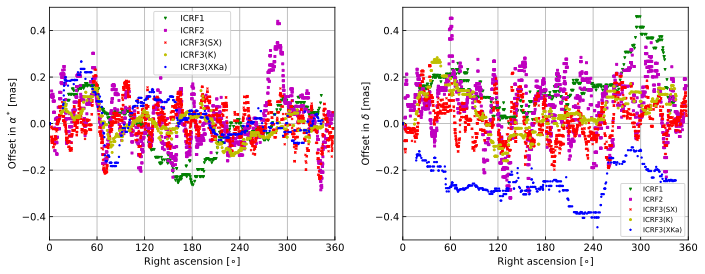

In [12]:
# Plot the smoothed positional formal error
fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, figsize=(10, 4))

ax0.plot(ra_icrf1, dra_icrf1, "gv", ms=2, label="ICRF1")
ax0.plot(ra_icrf2, dra_icrf2, "ms", ms=2, label="ICRF2")
ax0.plot(ra_icrf3sx, dra_icrf3sx, "rx", ms=2, label="ICRF3(SX)")
ax0.plot(ra_icrf3k, dra_icrf3k, "yo", ms=2, label="ICRF3(K)")
ax0.plot(ra_icrf3xka, dra_icrf3xka, "b*", ms=2, label="ICRF3(XKa)")

ax0.set_xlim([0, 360])
ax0.set_ylim([-0.5, 0.5])
ax0.set_xticks(np.arange(0, 361, 60))
ax0.set_xlabel("Right ascension [$\\circ$]")
ax0.set_ylabel("Offset in $\\alpha^*$ [mas]")
ax0.grid()
ax0.legend(fontsize="small")

ax1.plot(ra_icrf1, ddec_icrf1, "gv", ms=2, label="ICRF1")
ax1.plot(ra_icrf2, ddec_icrf2, "ms", ms=2, label="ICRF2")
ax1.plot(ra_icrf3sx, ddec_icrf3sx, "rx", ms=2, label="ICRF3(SX)")
ax1.plot(ra_icrf3k, ddec_icrf3k, "yo", ms=2, label="ICRF3(K)")
ax1.plot(ra_icrf3xka, ddec_icrf3xka, "b*", ms=2, label="ICRF3(XKa)")

ax1.set_ylim([-0.5, 0.5])
ax1.set_xlabel("Right ascension [$\\circ$]")
ax1.set_ylabel("Offset in $\\delta$ [mas]")
ax1.grid()
ax1.legend(fontsize="x-small")

fig.tight_layout()